# <b>Internship September 2024</b>
## <b>Innomatics Research Labs</b>
### <u>EDA</u> - <u>Project_2</u> - <u>Data Analysis on Electric Vehicle</u>


#### Task-1

#### <b><u>DATA DESCRIPTION</u></b>
#### <b><u>Feature</u></b> <b>:</b> <b><u>Description</u></b>
##### <b>VIN (1-10)</b>: The vehicle identification number.
##### <b>County</b>: Geographical subdivision within a state.
##### <b>City</b>: City where the vehicle is registered or located.
##### <b>State</b>: The state where the vehicle is located.
##### <b>Postal Code</b>: Postal code of the vehicle's location.
##### <b>Model Year</b>: The manufacturing year of the vehicle.
##### <b>Make</b>: The manufacturer of the vehicle (e.g., Tesla, Nissan, etc.).
##### <b>Model</b>: The specific model of the vehicle (e.g., Tesla Model S).
##### <b>Electric Vehicle Type</b>: The type of EV (e.g., Battery Electric Vehicle (BEV), Plug-in Hybrid Electric Vehicle (PHEV)).
##### <b>CAFV Eligibility</b>: Whether the vehicle is eligible for Clean Alternative Fuel Vehicle (CAFV) benefits.
##### <b>Electric Range</b>: The range the vehicle can travel on electric power (in miles).
##### <b>Base MSRP</b>: The manufacturer’s suggested retail price (initial cost of the vehicle).
##### <b>Legislative District</b>: The legislative district where the vehicle is registered.
##### <b>DOL Vehicle ID</b>: A unique ID assigned to the vehicle by the Department of Licensing.
##### <b>Vehicle Location</b>: Geographical coordinates of the vehicle.
##### <b>Electric Utility</b>: The electric utility provider for the area.
##### <b>2020 Census Tract</b>: A geographical area defined by the Census Bureau.

In [31]:
#import libraries
import pandas as pd
import numpy as np

In [32]:
#Load Dataset
df=pd.read_csv("dataset.csv")

In [33]:
#print first few rows of dataframe
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [34]:
df.shape

(112634, 17)

In [35]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

#### Data Cleaning

In [37]:
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [38]:
# Convert 'Postal Code' and '2020 Census Tract' to object (string) type
df['Postal Code'] = df['Postal Code'].astype(str)
df['2020 Census Tract'] = df['2020 Census Tract'].astype(str)

# Convert 'Legislative District' to int, handling missing values by filling them with 0
# Here, I'll fill missing values with 0 to convert it to an int type
df['Legislative District'] = df['Legislative District'].fillna(0).astype(int)


In [39]:
#Impute missing values in 'Model' with the most frequent value (mode)
most_frequent_model = df['Model'].mode()[0]
df['Model'].fillna(most_frequent_model, inplace=True)

<ipython-input-39-f0bc57db9244>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model'].fillna(most_frequent_model, inplace=True)


In [40]:
#Drop rows where 'Vehicle Location' is missing
df.dropna(subset=['Vehicle Location'], inplace=True)

#Impute missing values in 'Electric Utility' with 'Unknown'
df['Electric Utility'].fillna('Unknown', inplace=True)


<ipython-input-40-a096e549ecf3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Utility'].fillna('Unknown', inplace=True)


In [41]:
#Verify if all missing values are handled
missing_values_after = df.isna().sum()

In [42]:
missing_values_after

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [43]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112610 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         112610 non-null  object
 1   County                                             112610 non-null  object
 2   City                                               112610 non-null  object
 3   State                                              112610 non-null  object
 4   Postal Code                                        112610 non-null  object
 5   Model Year                                         112610 non-null  int64 
 6   Make                                               112610 non-null  object
 7   Model                                              112610 non-null  object
 8   Electric Vehicle Type                              112610 non-null  object
 9   Clean Alt

In [44]:
# Remove outliers based on the conditions provided

# 1. Remove entries with Model Year before 2010
df_filtered = df[df['Model Year'] >= 2010]

# 2. Remove entries where Base MSRP is 0 or greater than 175,000
df_filtered = df_filtered[(df_filtered['Base MSRP'] > 0) & (df_filtered['Base MSRP'] <= 175000)]

# 3. Remove PHEV entries where Electric Range is greater than 50
df_filtered = df_filtered[~((df_filtered['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)') & (df_filtered['Electric Range'] > 50))]


In [45]:
# Verify the changes in the filtered dataset
df_filtered.describe()

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,3475.000000,3475.000000,3475.000000,3475.000000,3.475000e+03
mean,2015.529496,125.497842,56586.010072,30.640863,2.054108e+08
std,2.396128,89.067450,16839.576804,14.597555,1.004608e+08
min,2010.000000,12.000000,31950.000000,0.000000,9.658900e+04
25%,2013.000000,17.000000,39995.000000,21.000000,1.424952e+08
50%,2016.000000,111.000000,59900.000000,35.000000,1.898982e+08
75%,2018.000000,208.000000,69900.000000,43.000000,2.429121e+08
max,2020.000000,265.000000,110950.000000,49.000000,4.788591e+08


In [46]:
# Verify the changes in the filtered dataset
df_filtered.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
9,KNDJP3AE2G,Skagit,Anacortes,WA,98221,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,40,100489049,POINT (-122.61214 48.51748),PUGET SOUND ENERGY INC,53057940301
24,WBAJB1C51K,Snohomish,Lynnwood,WA,98087,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15,55700,21,180189544,POINT (-122.27981 47.85727),PUGET SOUND ENERGY INC,53061042004
33,KNDJX3AE6J,Thurston,Lacey,WA,98503,2018,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,111,33950,22,333554245,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,53067011200
190,5YJSA1H16E,King,Renton,WA,98056,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41,221096403,POINT (-122.18463 47.49929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024704
191,5YJSA1H12E,King,Sammamish,WA,98075,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,41,336807320,POINT (-122.03539 47.61344),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032215


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


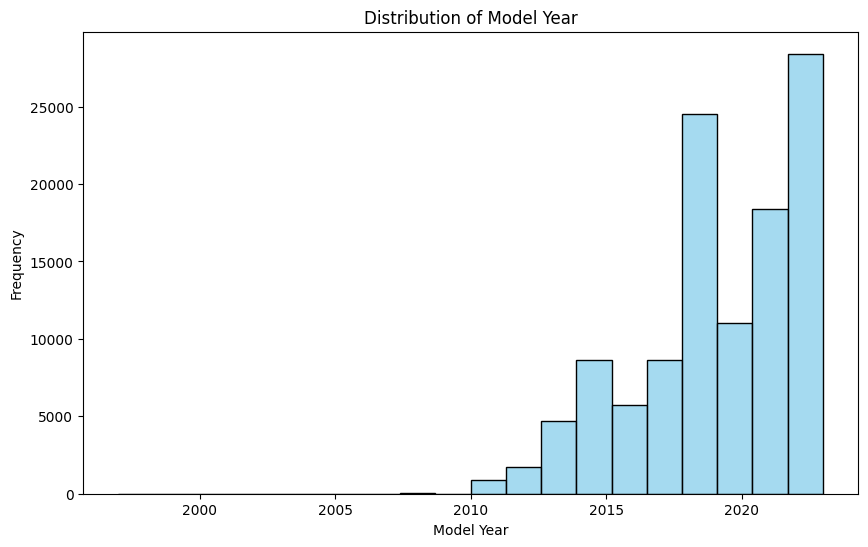

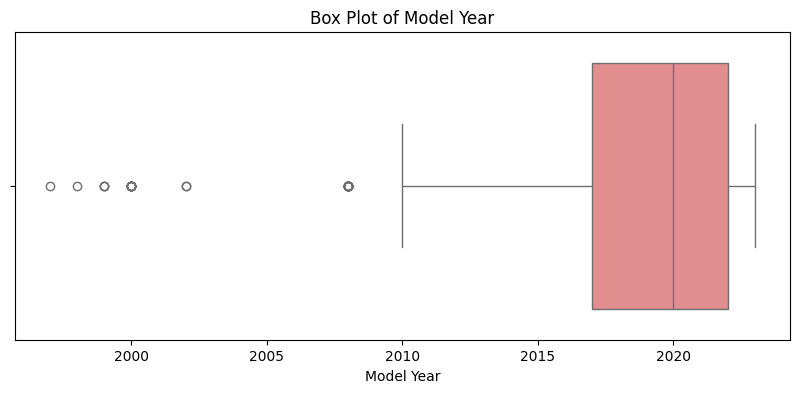

In [48]:
#Univariate --  Numerical -- Visual Analysis
# Model Year Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Model Year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

# Model Year Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Model Year'], color='lightcoral')
plt.title('Box Plot of Model Year')
plt.show()

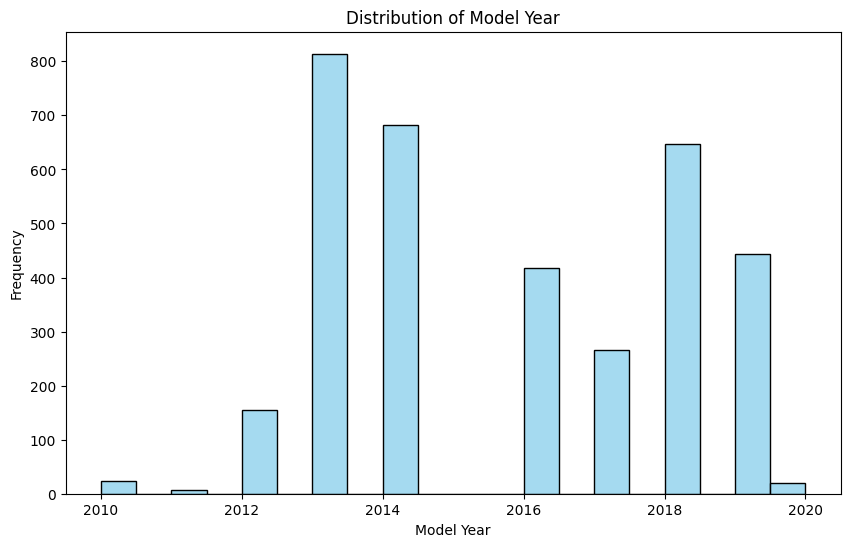

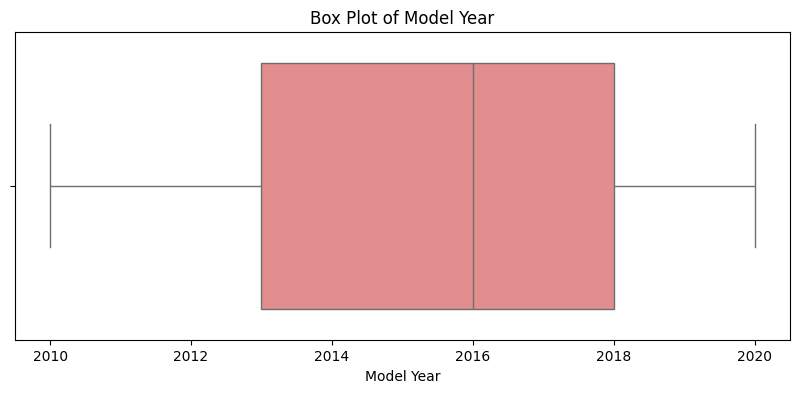

In [49]:
# Remove outliers based on the specified conditions

#filtered_model_year = df[(df['Model Year'] >= 2010)]

# Model Year Histogram
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Model Year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()


# Model Year Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df_filtered['Model Year'], color='lightcoral')
plt.title('Box Plot of Model Year')
plt.show()

In [50]:
# The histogram show the distribution of Model year Key Year- 2013
# The box plot shows that most of the spread is lying in between 2013 to 2018

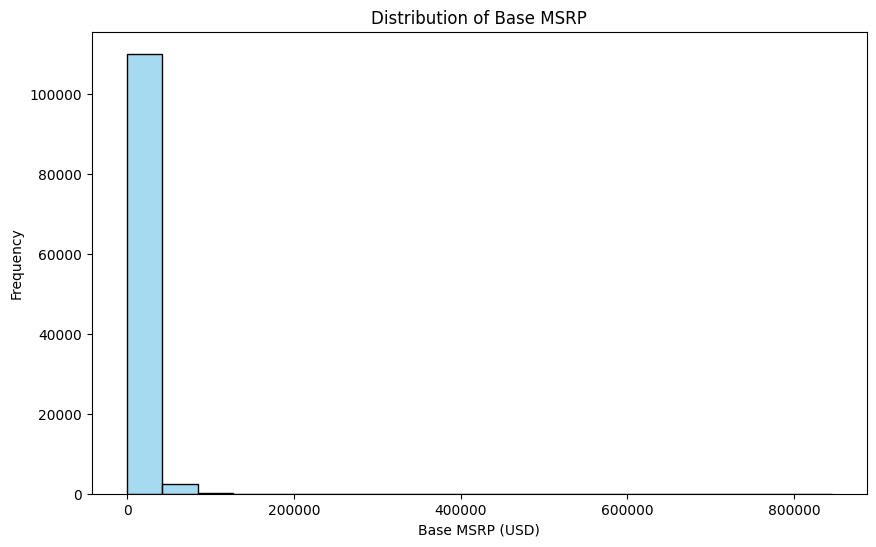

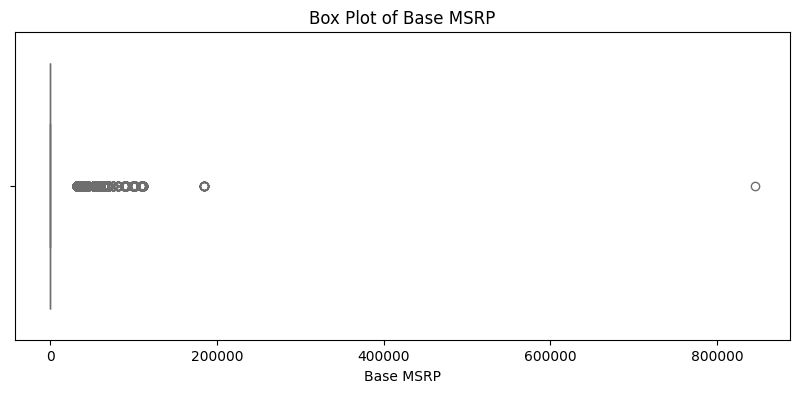

In [51]:
# Base MSRP Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Base MSRP'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP (USD)')
plt.ylabel('Frequency')
plt.show()

# Base MSRP Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Base MSRP'], color='lightcoral')
plt.title('Box Plot of Base MSRP')
plt.show()

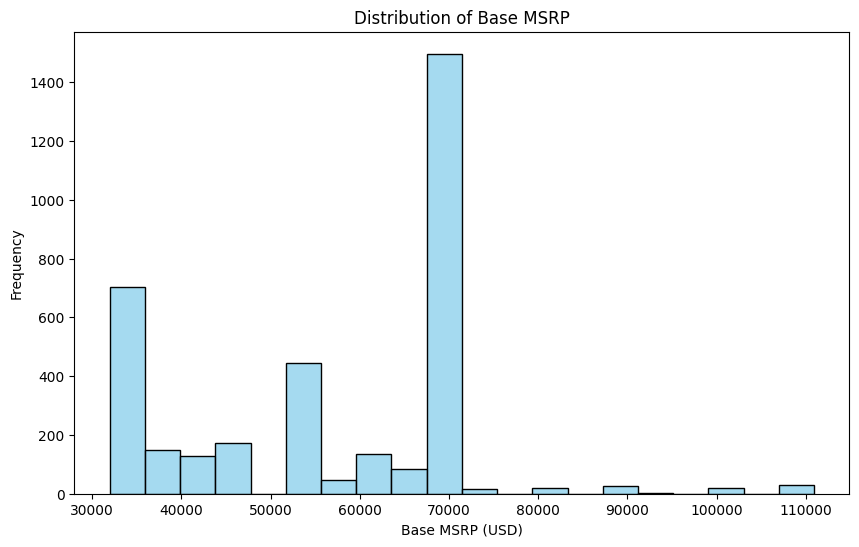

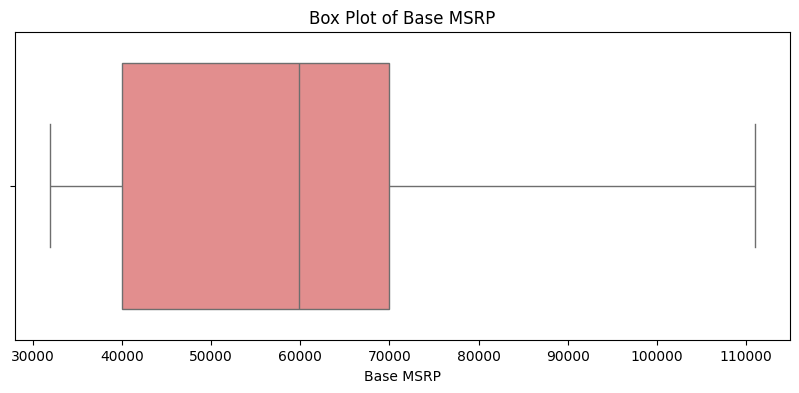

In [52]:
# Remove outliers based on the specified conditions
#filtered_base_msrp = df[(df['Base MSRP'] <= 175000)]

# Base MSRP Histogram
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Base MSRP'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP (USD)')
plt.ylabel('Frequency')
plt.show()

# Base MSRP Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df_filtered['Base MSRP'], color='lightcoral')
plt.title('Box Plot of Base MSRP')
plt.show()

In [53]:
# The histogram show the distribution of Base MSRP Key value is 70000
# The box plot shows that most of the distribution of price is lying in between 40000 to 70000

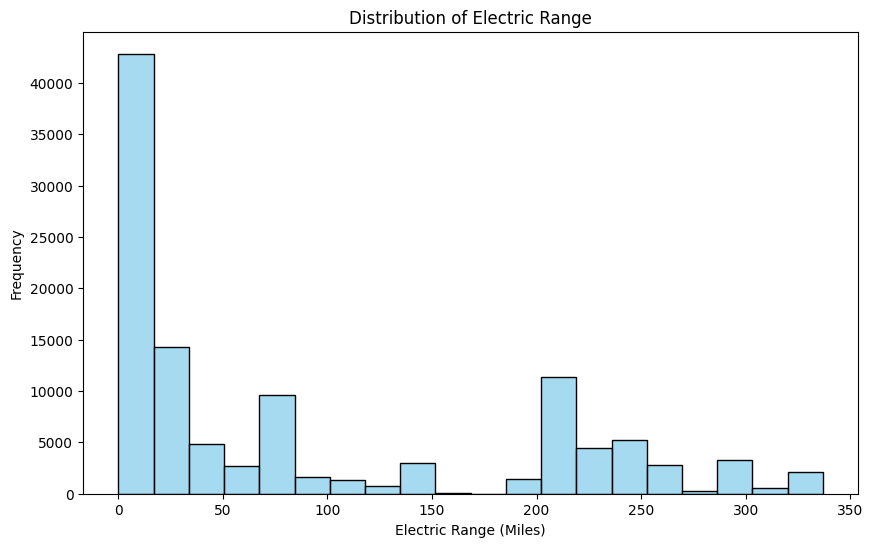

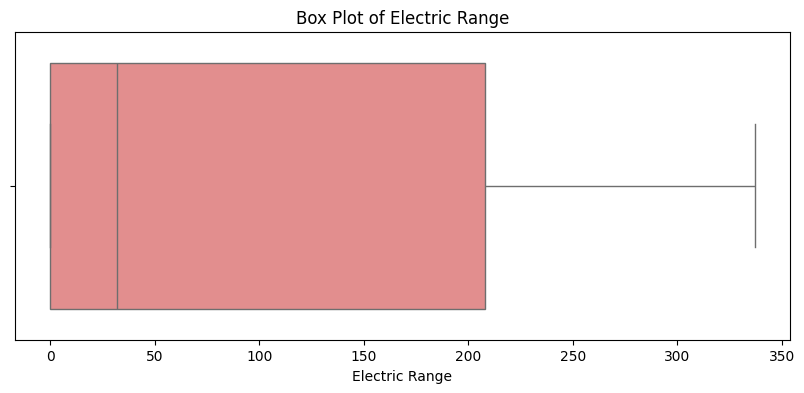

In [54]:
# Electric Range Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Electric Range'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Frequency')
plt.show()

# Electric Range Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Electric Range'], color='lightcoral')
plt.title('Box Plot of Electric Range')
plt.show()


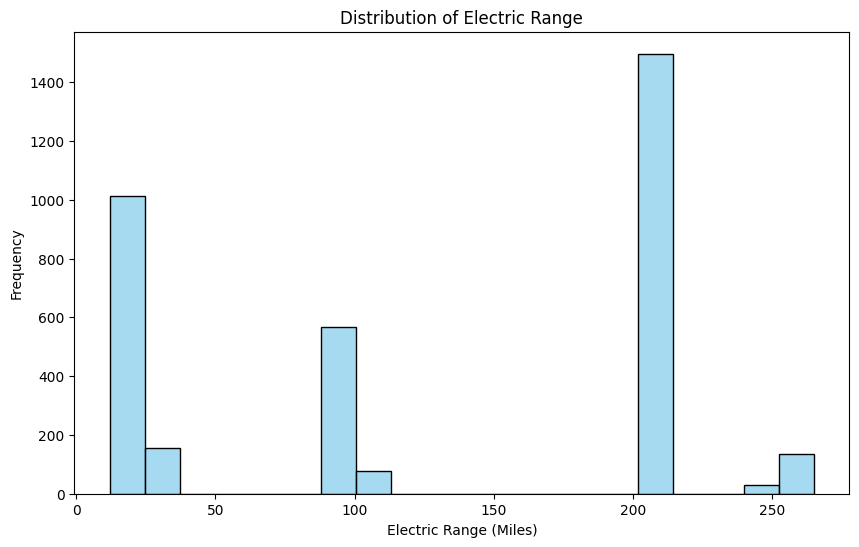

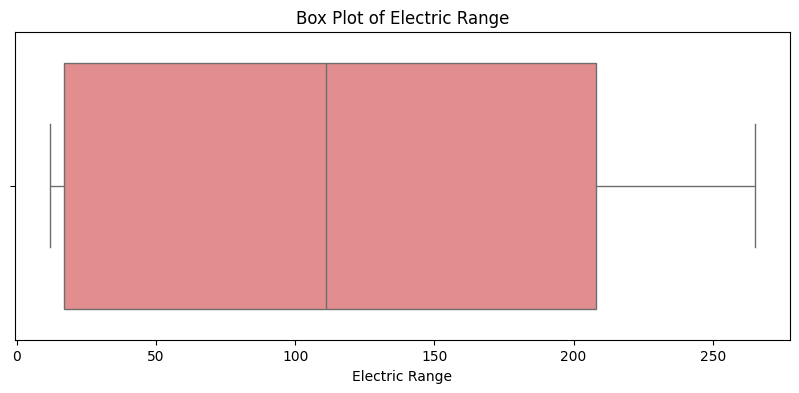

In [55]:

# Electric Range Histogram
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Electric Range'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Frequency')
plt.show()

# Electric Range Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df_filtered['Electric Range'], color='lightcoral')
plt.title('Box Plot of Electric Range')
plt.show()


In [56]:
# The histogram show the distribution of Electric Range(miles) Key value- above 200(miles)
# The box plot shows that most of the spread is lying in around 10 to 200
#50% of the distribution is in between 10 to 110 and other 50 % of distribution is between 110 to 210.(Approx)(Miles)

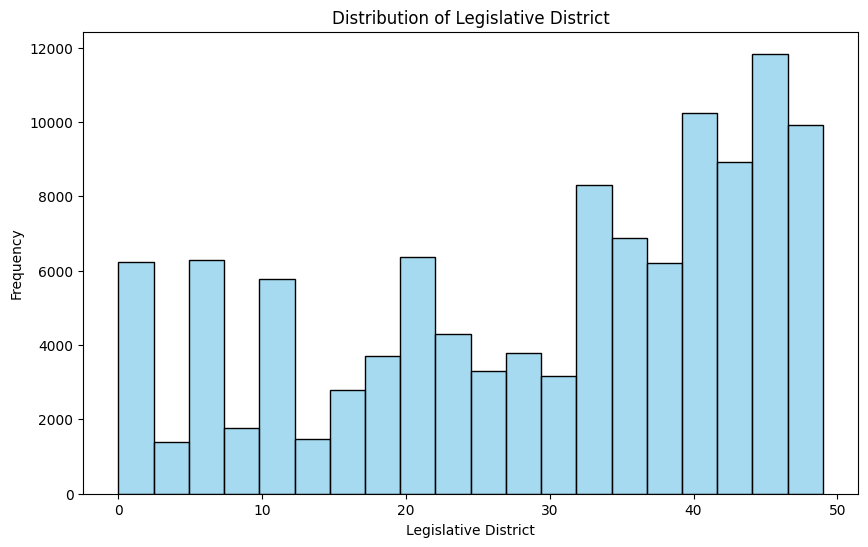

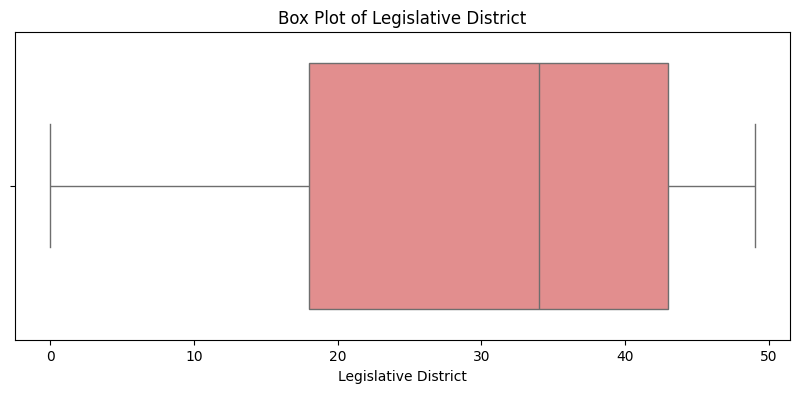

In [57]:
# Legislative District Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Legislative District'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Frequency')
plt.show()

# Legislative District Box Plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Legislative District'], color='lightcoral')
plt.title('Box Plot of Legislative District')
plt.show()


In [58]:
# The histogram show the distribution of Legislative District increasing
# The box plot shows that most of the distribution is lying in between around 17 to 43

In [59]:
df.dtypes

,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,object
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


In [60]:
#Univariate --  Numerical -- Non-Visual Analysis

# Select numerical columns for analysis (excluding DOL Vehicle ID and 2020 Census Tract)
numerical_columns = ["Model Year", "Electric Range", "Base MSRP", "Legislative District"]
# Generate summary statistics for numerical columns
numerical_summary = df_filtered[numerical_columns].describe()

numerical_summary

,Model Year,Electric Range,Base MSRP,Legislative District
count,3475.000000,3475.000000,3475.000000,3475.000000
mean,2015.529496,125.497842,56586.010072,30.640863
std,2.396128,89.067450,16839.576804,14.597555
min,2010.000000,12.000000,31950.000000,0.000000
25%,2013.000000,17.000000,39995.000000,21.000000
50%,2016.000000,111.000000,59900.000000,35.000000
75%,2018.000000,208.000000,69900.000000,43.000000
max,2020.000000,265.000000,110950.000000,49.000000


In [61]:
#Univariate -- Categorical -- Non-Visual Analysis
# Analyzing categorical columns
# List of categorical columns
categorical_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Make', 'Model',
                       'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                       'Vehicle Location', 'Electric Utility', '2020 Census Tract']

# Function to generate non-visual insights for categorical columns
def analyze_categorical(df, columns):
    insights = []
    for column in columns:
        unique_values = df[column].nunique()  # Number of unique values
        most_frequent_value = df[column].mode()[0]  # Most frequent value
        frequency = df[column].value_counts().iloc[0]  # Frequency of most frequent value
        total_count = len(df)  # Total number of rows

        # Append the results to the insights list
        insights.append({
            'Column': column,
            'Unique Values': unique_values,
            'Most Frequent Value': most_frequent_value,
            'Frequency of Most Frequent Value': frequency,
            'Total Count': total_count
        })

    # Convert the list of insights into a DataFrame
    insights_df = pd.DataFrame(insights)
    return insights_df

# Create the DataFrame of insights
insights_df = analyze_categorical(df, categorical_columns)

# Display the DataFrame
insights_df.head(12)
#print(insights_df.head())

,Column,Unique Values,Most Frequent Value,Frequency of Most Frequent Value,Total Count
0,VIN (1-10),7548,5YJYGDEE9M,472,112610
1,County,162,King,58996,112610
2,City,623,Seattle,20301,112610
3,State,45,WA,112329,112610
4,Postal Code,758,98052,2916,112610
5,Make,34,TESLA,52074,112610
6,Model,114,MODEL 3,23153,112610
7,Electric Vehicle Type,2,Battery Electric Vehicle (BEV),86030,112610
8,Clean Alternative Fuel Vehicle (CAFV) Eligibility,3,Clean Alternative Fuel Vehicle Eligible,58626,112610
9,Vehicle Location,758,POINT (-122.13158 47.67858),2916,112610


In [62]:
#Univariate -- Categorical -- Visual Analysis

<ipython-input-63-a593a3e774ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Make', order=df['Make'].value_counts().nlargest(10).index, palette='coolwarm')


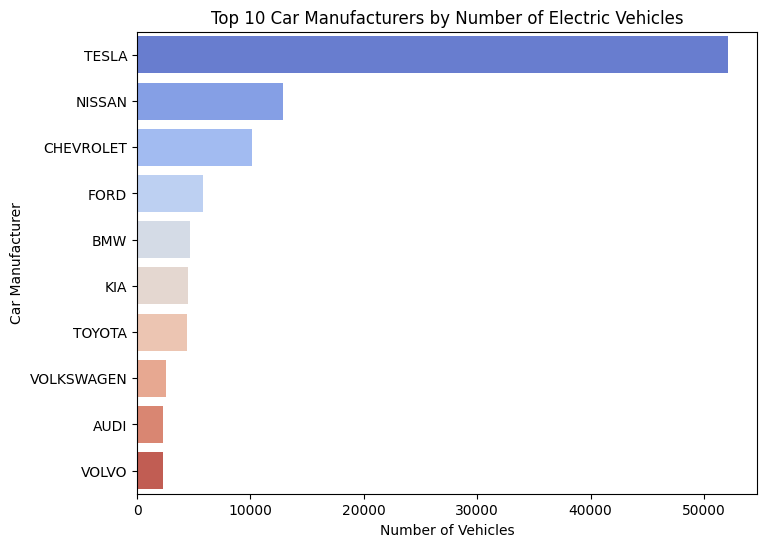

In [63]:
# Distribution of Car Manufacturers (Top 10)
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='Make', order=df['Make'].value_counts().nlargest(10).index, palette='coolwarm')
plt.title('Top 10 Car Manufacturers by Number of Electric Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Car Manufacturer')
plt.show()

In [64]:
# Insights:
# The top 10 manufacturers with the most electric vehicles displayed,Key Player - TESLA

<ipython-input-65-bbf095f144de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Model', order=df['Model'].value_counts().nlargest(10).index, palette='coolwarm')


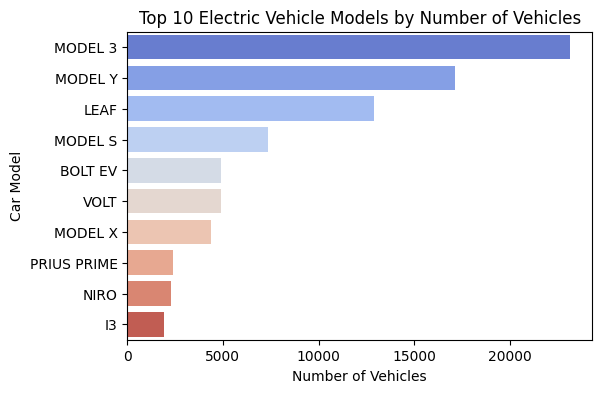

In [65]:
# Top Electric Vehicle Models (Top 10)
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='Model', order=df['Model'].value_counts().nlargest(10).index, palette='coolwarm')
plt.title('Top 10 Electric Vehicle Models by Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Car Model')
plt.show()


In [66]:
# Insights:
# This plot shows the most popular electric vehicle models,Highest in-demand model-MODEL-3 a/c to this dataset

<ipython-input-67-2daf9841195b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='State', order=df['State'].value_counts().index, palette='coolwarm')


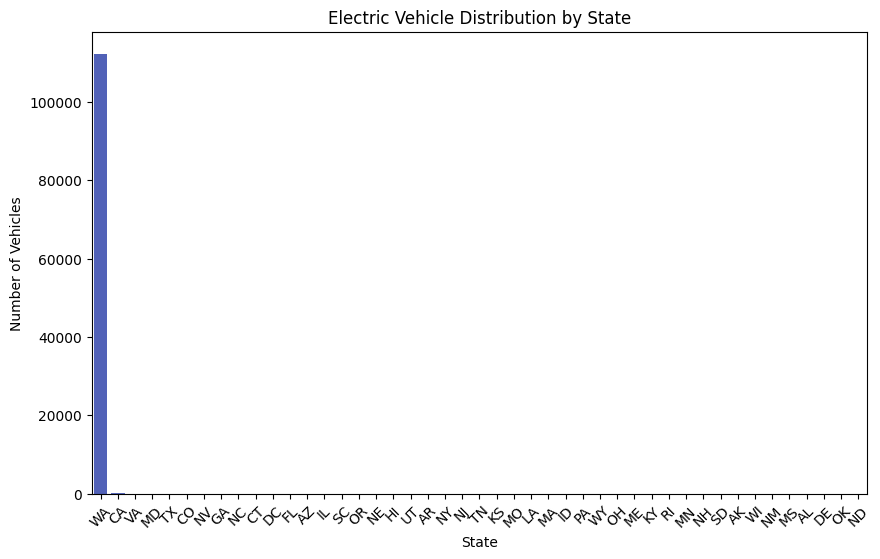

In [67]:
# Electric Vehicle Distribution by State
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index, palette='coolwarm')
plt.title('Electric Vehicle Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()


In [68]:
# Insights:
# This plot shows the states having the highest number of electric vehicles,(Key State-WA)

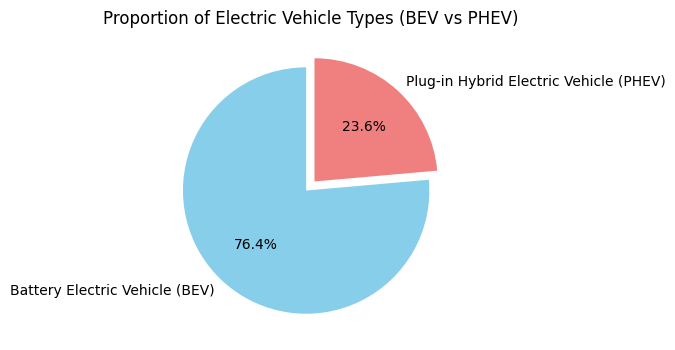

In [69]:
# Proportion of Electric Vehicle Types (BEV vs PHEV)
plt.figure(figsize=(4,4))
df['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90, explode=(0.05, 0.05))
plt.title('Proportion of Electric Vehicle Types (BEV vs PHEV)')
plt.ylabel('')
plt.show()


In [70]:
# Insights:
# This pie chart helps to identify the proportion of Battery Electric Vehicles (BEVs=76.4%) vs. Plug-in Hybrid Electric Vehicles (PHEVs=23.6%).

<ipython-input-71-79837e683003>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='coolwarm')


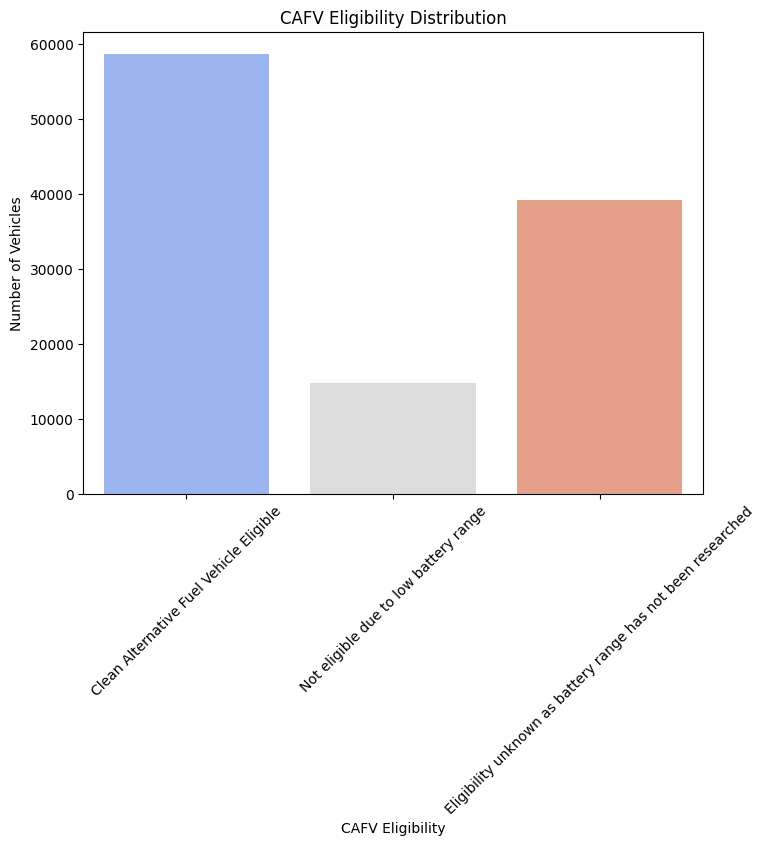

In [71]:
# CAFV Eligibility Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', palette='coolwarm')
plt.title('CAFV Eligibility Distribution')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()


In [72]:
# Insights:
# This plot shows the number of electric vehicles that are eligible or not eligible for clean alternative fuel vehicle programs.

<ipython-input-73-37a2ff6a9c59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Electric Utility', order=df['Electric Utility'].value_counts().nlargest(10).index, palette='coolwarm')


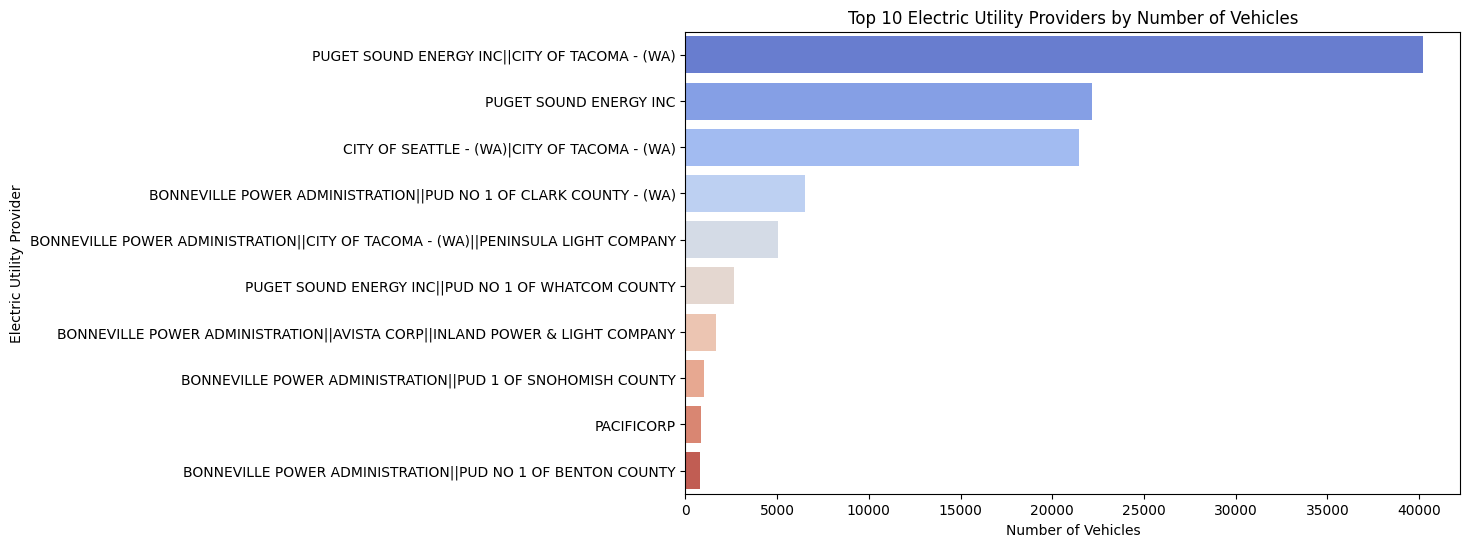

In [73]:
# Top Electric Utility Providers (Top 10)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Electric Utility', order=df['Electric Utility'].value_counts().nlargest(10).index, palette='coolwarm')
plt.title('Top 10 Electric Utility Providers by Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Electric Utility Provider')
plt.show()


In [74]:
# Insights:
# This plot shows the top electric utility providers serving the highest number of electric vehicles.
#[Key Provider-PUGET SUND ENERGY INC||CITY OF TACOMA-(WA)]

In [75]:
# Bivariate -- Non-Visual
# Numerical v/s Numerical -- Numerical v/s Categorical  -- Categorical v/s Categorical

In [76]:
#Numerical v/s Numerical
# Selecting relevant numerical columns for bivariate analysis
numerical_cols = df_filtered[['Model Year', 'Electric Range', 'Base MSRP']]

# Calculating correlation matrix
correlation_matrix = numerical_cols.corr()

# Calculating covariance matrix
covariance_matrix = numerical_cols.cov()

correlation_matrix, covariance_matrix

(                Model Year  Electric Range  Base MSRP
 Model Year        1.000000       -0.939518  -0.650282
 Electric Range   -0.939518        1.000000   0.591964
 Base MSRP        -0.650282        0.591964   1.000000,
                   Model Year  Electric Range     Base MSRP
 Model Year          5.741430     -200.509220 -2.623875e+04
 Electric Range   -200.509220     7933.010574  8.878619e+05
 Base MSRP      -26238.751736   887861.853073  2.835713e+08)

In [77]:
# "There are no strong linear relationships between these numerical variables"

In [78]:
#Numerical v/s Categorical

categorical_cols = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model','Electric Vehicle Type',
                   'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Vehicle Location', 'Electric Utility']
numerical_cols = ['Model Year', 'Electric Range', 'Base MSRP']

# Descriptive statistics for 'Electric Range' and 'Base MSRP' by 'Electric Vehicle Type'
ev_type_stats = df_filtered.groupby('Electric Vehicle Type')[['Electric Range', 'Base MSRP']].describe()
ev_type_stats

Electric Range                         \
                                                count        mean        std   
Electric Vehicle Type                                                          
Battery Electric Vehicle (BEV)                 2306.0  180.302255  54.823615   
Plug-in Hybrid Electric Vehicle (PHEV)         1169.0   17.389222   6.033717   

                                                                          \
                                         min    25%    50%    75%    max   
Electric Vehicle Type                                                      
Battery Electric Vehicle (BEV)          93.0  111.0  208.0  208.0  265.0   
Plug-in Hybrid Electric Vehicle (PHEV)  12.0   14.0   16.0   17.0   33.0   

                                       Base MSRP                              \
                                           count          mean           std   
Electric Vehicle Type                                                          
Battery Electric Vehicle (BEV)            2306.0  59354.813530  17679.609584   
Plug-in Hybrid Electric Vehicle (PHEV)    1169.0  51124.195894  13475.780531   

                                                                            \
                                            min      25%      50%      75%   
Electric Vehicle Type                                                        
Battery Electric Vehicle (BEV)          31950.0  33950.0  69900.0  69900.0   
Plug-in Hybrid Electric Vehicle (PHEV)  34995.0  39995.0  52900.0  54950.0   

                                                  
                                             max  
Electric Vehicle Type                             
Battery Electric Vehicle (BEV)          110950.0  
Plug-in Hybrid Electric Vehicle (PHEV)  102000.0

In [79]:
# Check unique values in the 'CAFV Eligibility' column
unique_vals = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()
unique_vals

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [80]:
#Categorical v/s Categorical

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Electric Vehicle Type'], df['State'])

# Perform Chi-Square Test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Contingency Table:\n", contingency_table)
print("\nChi-Square Test Statistic:", chi2_stat)
print("P-Value:", p_val)

Contingency Table:
 State                                   AK  AL  AR  AZ  CA  CO  CT  DC  DE  \
Electric Vehicle Type                                                        
Battery Electric Vehicle (BEV)           0   0   3   4  49   7   1   4   1   
Plug-in Hybrid Electric Vehicle (PHEV)   1   1   1   2  25   2   5   2   0   

State                                   FL  ...  RI  SC  SD  TN  TX  UT  VA  \
Electric Vehicle Type                       ...                               
Battery Electric Vehicle (BEV)           3  ...   1   4   1   3   9   2  23   
Plug-in Hybrid Electric Vehicle (PHEV)   3  ...   0   1   0   0   4   2  13   

State                                      WA  WI  WY  
Electric Vehicle Type                                  
Battery Electric Vehicle (BEV)          85855   1   2  
Plug-in Hybrid Electric Vehicle (PHEV)  26474   0   0  

[2 rows x 45 columns]

Chi-Square Test Statistic: 85.84728935097851
P-Value: 0.00016310448956638693


In [81]:
# Insight:
# we reject the null hypothesis,and significant relationship between the two categorical variables.

In [82]:
# Bivariate -- Visual
# Numerical v/s Numerical -- Numerical v/s Categorical  -- Categorical v/s Categorical

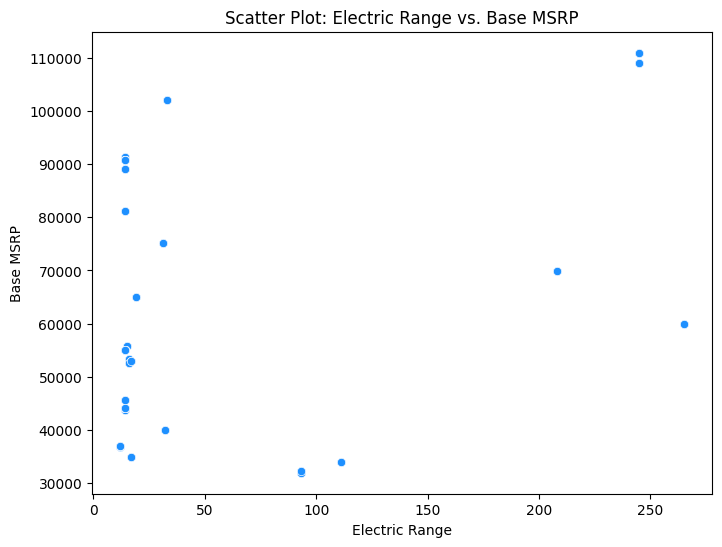

In [83]:
#Numerical v/s Numerical

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_filtered['Electric Range'], y=df_filtered['Base MSRP'], data=df_filtered, color='dodgerblue')
plt.title('Scatter Plot: Electric Range vs. Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()

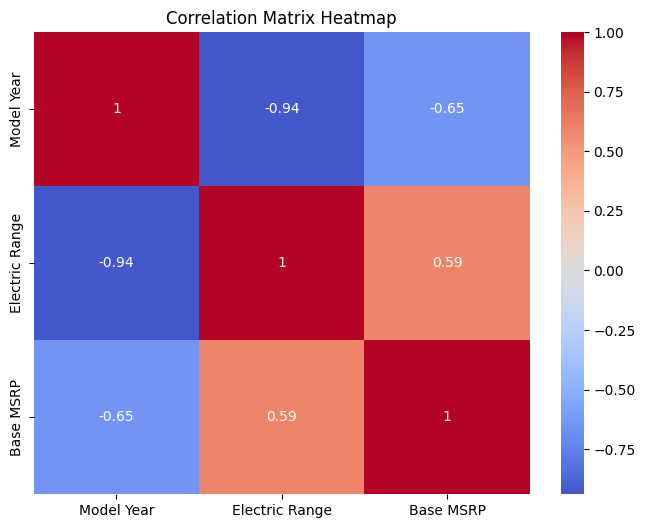

In [84]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df_filtered[['Model Year', 'Electric Range', 'Base MSRP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
# Most vehicles are clustered at the 0-50 of both Electric Range and 34k-10.2k Base MSRP, indicating that many EVs are relatively affordable and have moderate ranges.
# There is moderate relationship between a vehicle's range and its price. And Model year with Electric Range and Base MSRP has negative correlation
# Newer models do not necessarily has higher price.

<ipython-input-86-33dd751758ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')


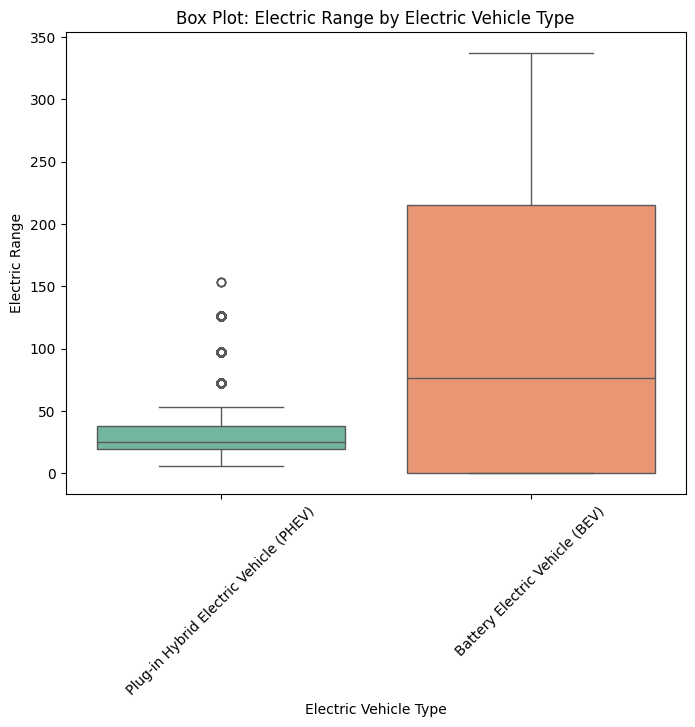

In [86]:
#Numerical v/s Categorical
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')
plt.title('Box Plot: Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

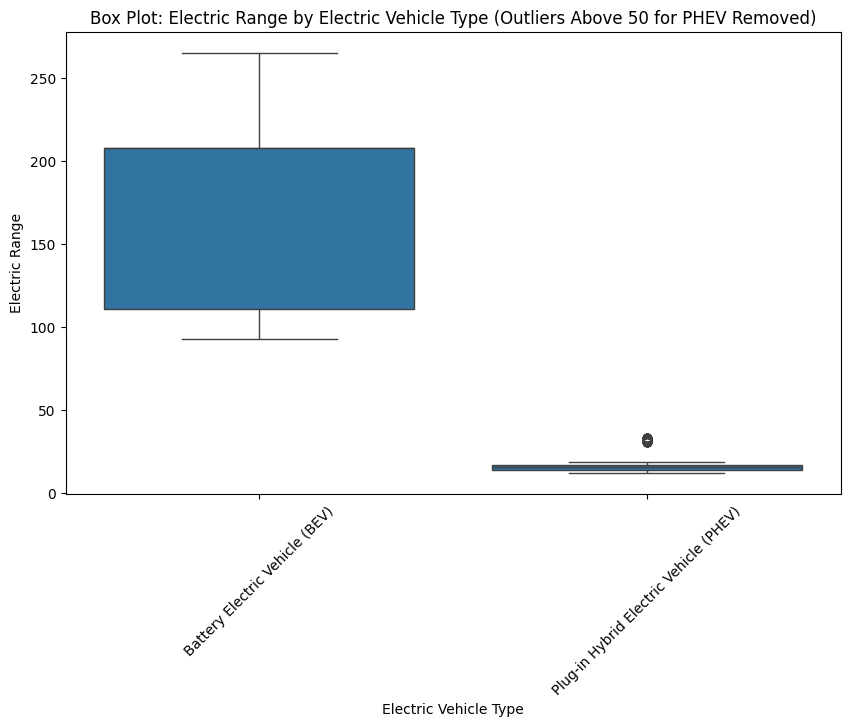

In [87]:
# Create a copy of the dataframe to avoid modifying the original data
#df_filtered = df.copy()

# Remove rows where Electric Range for PHEVs is greater than 50
df_filtered = df_filtered[~((df_filtered['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)') & (df_filtered['Electric Range'] > 50))]

# Box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Electric Vehicle Type', y='Electric Range')
plt.title('Box Plot: Electric Range by Electric Vehicle Type (Outliers Above 50 for PHEV Removed)')
plt.xticks(rotation=45)
plt.show()

In [88]:
# The box figure shows that most of the spread PHEV has less range compared to BEV

<Figure size 1000x600 with 0 Axes>

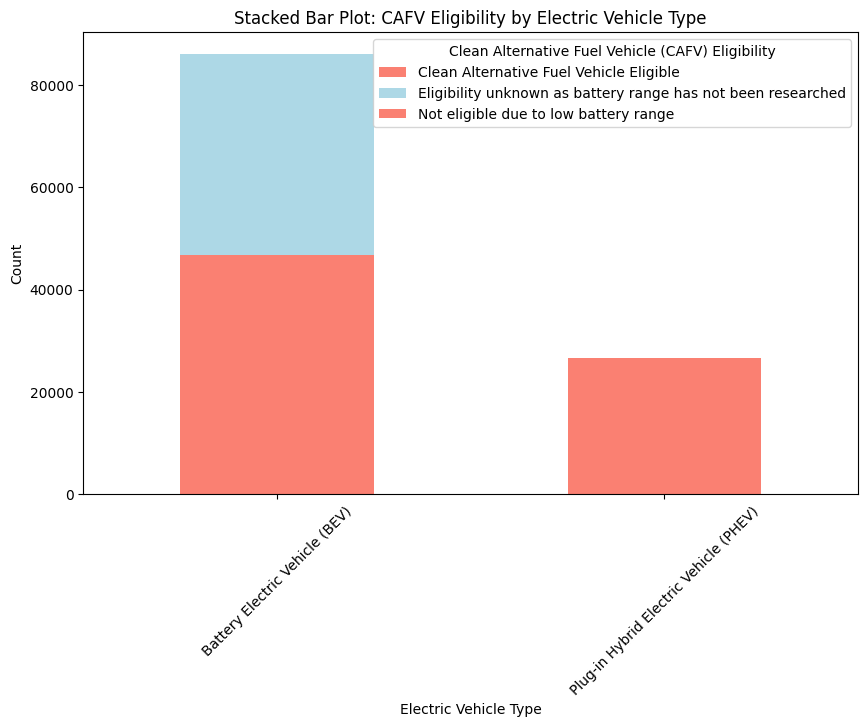

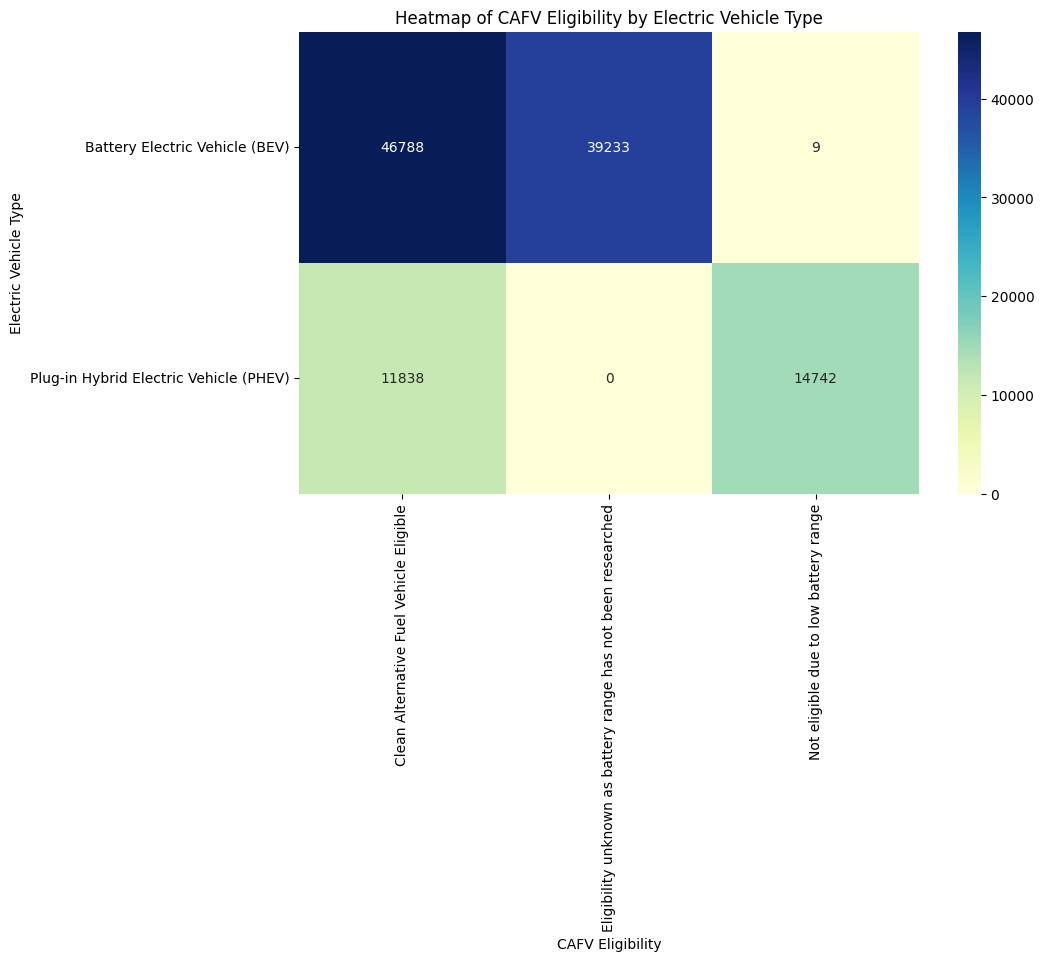

In [89]:
#Categorical v/s Categorical
# Stacked Bar Plot
plt.figure(figsize=(10, 6))
ct_table = pd.crosstab(df['Electric Vehicle Type'], df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
ct_table.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title('Stacked Bar Plot: CAFV Eligibility by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Heatmap of Contingency Table
plt.figure(figsize=(10, 6))
sns.heatmap(ct_table, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Heatmap of CAFV Eligibility by Electric Vehicle Type')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Vehicle Type')
plt.show()

<Figure size 1000x600 with 0 Axes>

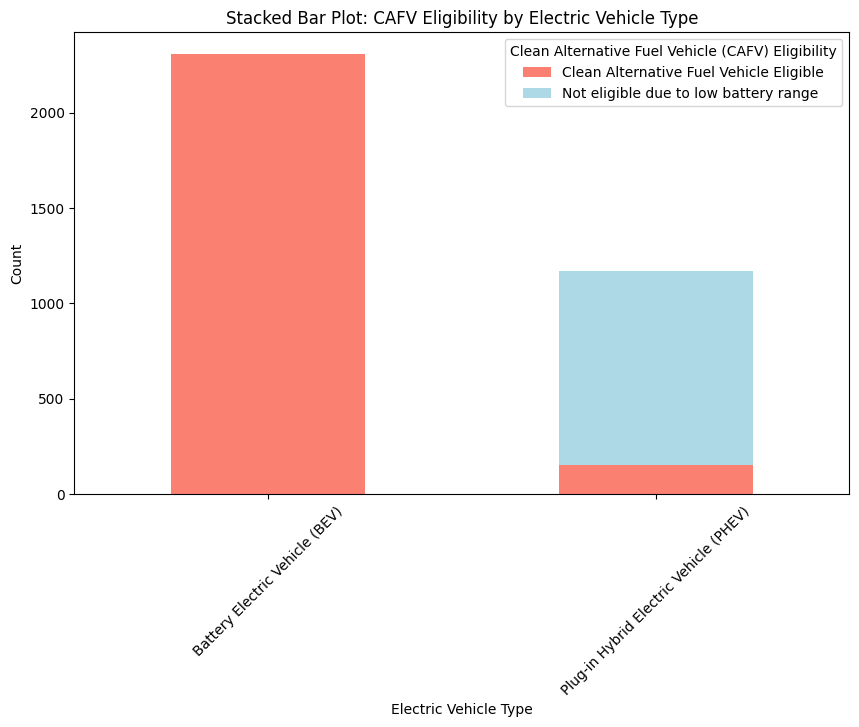

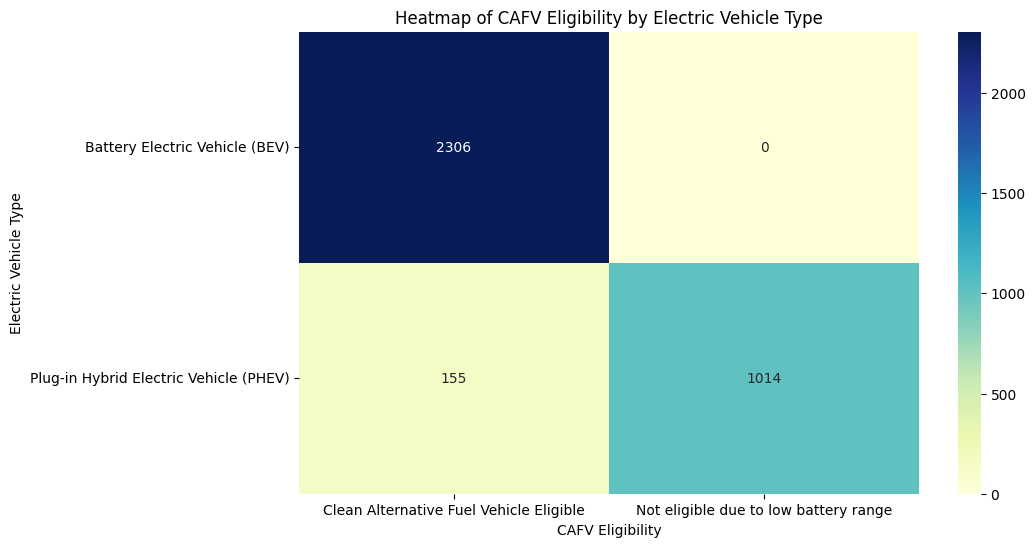

In [90]:
#Plots on Filtered dataframe
#Categorical v/s Categorical
# Stacked Bar Plot
plt.figure(figsize=(10, 6))
ct_table = pd.crosstab(df_filtered['Electric Vehicle Type'], df_filtered['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
ct_table.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title('Stacked Bar Plot: CAFV Eligibility by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Heatmap of Contingency Table
plt.figure(figsize=(10, 6))
sns.heatmap(ct_table, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Heatmap of CAFV Eligibility by Electric Vehicle Type')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Vehicle Type')
plt.show()

#### Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [91]:
#!pip install plotly

In [92]:
import plotly.express as px

In [93]:
#px.scatter(df,x='Electric Range', y='Base MSRP')
#px.box(df,x='Electric Vehicle Type', y='Electric Range')

In [94]:
# Aggregate the data to count the number of vehicles per state
EV_State_data = df.groupby(['State','County']).size().reset_index(name='Number of Vehicles')

# Create a static choropleth map
fig = px.choropleth(
    EV_State_data,
    locations='State',  # column with state abbreviations
    locationmode='USA-states',  # Location mode for US States
    scope='usa',  # Focus on USA
    color='Number of Vehicles',  # Color based on the number of vehicles
    hover_name='County',
    title='Number of Electric Vehicles by State',
    color_continuous_scale='rainbow'
)

fig.show()

In [95]:
# Insights:
# This map will help visualize which states have the highest concentration of electric vehicles.

In [96]:
# Aggregate data for choropleth by state and model year
EV_State_data_year = df.groupby(['State', 'Model Year']).size().reset_index(name='Number of Vehicles')

# Create the animated choropleth map
fig = px.choropleth(
    EV_State_data_year,
    locations='State',  # State column
    locationmode='USA-states',  # For US states
    color='Number of Vehicles',  # Color based on the number of vehicles
    scope='usa',  # Focus on USA
    animation_frame='Model Year',  # Animate by 'Model Year'
    title='Electric Vehicles by State and Model Year',
    color_continuous_scale='Blues'
)

fig.show()

In [97]:
# Insights:
# This animated choropleth will allow you to track the growth or decline of electric vehicle adoption in each state over time.

#### Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [98]:
#!pip install bar-chart-race

In [100]:
# Restart the kernel after executing this cell
import sys
!{sys.executable} -m pip install bar_chart_race

import bar_chart_race as bcr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.9 MB/s eta 0:00:00


In [103]:
import os # Import the os module

os.environ['PATH'] += os.pathsep + r'C:\ffmpeg\ffmpeg-master-latest-win64-gpl\bin'

In [102]:
import os
print(os.getenv('PATH'))

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [104]:
#!pip install imageio imageio-ffmpeg

In [105]:
count_df=df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

In [ ]:
bcr.bar_chart_race(
    df=count_df,
    filename=None,
    title='EV Make Count Over the Years',
    period_length=3000,
    steps_per_period=45,
    figsize=(10,6),
    title_size=15,bar_label_size=10
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



#### Conclusion:
##### * BEVs offer much more electric range than PHEVs, making them more suitable for long-distance travel on electric power alone.
##### * PHEVs are primarily designed for shorter electric trips, relying on a combination of electric power and internal combustion engines.
##### * Choropleth maps display the distribution of EVs by state, revealing that certain regions have higher concentrations of electric vehicles
##### * No doubt, this EDA provides a solid foundation for understanding the electric vehicle market, supporting data-driven decisions.

#### THANK YOU!